## Nome

In [ ]:
# Nome: Gustavo do Vale Ferreira

## Imports

In [17]:
import warnings

import pandas as pd

warnings.filterwarnings('ignore')
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, RocCurveDisplay,
                             accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score, roc_auc_score, roc_curve)
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (LabelBinarizer, LabelEncoder, MinMaxScaler,
                                   OneHotEncoder, StandardScaler,
                                   label_binarize)
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import to_categorical

# Código

In [ ]:
data=pd.read_csv("faculdade\train_futebol.csv")
#Lendo a base

In [19]:
data.head(10)
#Gerando as 10 primeiras linhas do dataset

,Home,Away,Round,Date,Time,WIN,minuto,evento,Yellow_Away,Yellow_Home,Goal_Away,Goal_Home,Red_Card_Away,Red_Card_Home,Own_Home,Own_Away,Penalty_Missed_Home,Penalty_Missed_Away,Var_Home,Var_Away
0,Birmingham,West Ham,38,11.05.2003,16:00,Draw,27,Yellow_Away,1,0,0,0,0,0,0,0,0,0,0,0
1,Birmingham,West Ham,38,11.05.2003,16:00,Draw,57,Yellow_Home,1,1,0,0,0,0,0,0,0,0,0,0
2,Birmingham,West Ham,38,11.05.2003,16:00,Draw,66,Goal_Away,1,1,1,0,0,0,0,0,0,0,0,0
3,Birmingham,West Ham,38,11.05.2003,16:00,Draw,80,Goal_Home,1,1,1,1,0,0,0,0,0,0,0,0
4,Birmingham,West Ham,38,11.05.2003,16:00,Draw,88,Goal_Home,1,1,1,2,0,0,0,0,0,0,0,0
5,Birmingham,West Ham,38,11.05.2003,16:00,Draw,89,Goal_Away,1,1,2,2,0,0,0,0,0,0,0,0
6,Bolton,Middlesbrough,38,11.05.2003,16:00,Home,10,Goal_Home,0,0,0,1,0,0,0,0,0,0,0,0
7,Bolton,Middlesbrough,38,11.05.2003,16:00,Home,17,Yellow_Home,0,1,0,1,0,0,0,0,0,0,0,0
8,Bolton,Middlesbrough,38,11.05.2003,16:00,Home,19,Yellow_Away,1,1,0,1,0,0,0,0,0,0,0,0
9,Bolton,Middlesbrough,38,11.05.2003,16:00,Home,21,Goal_Home,1,1,0,2,0,0,0,0,0,0,0,0


In [20]:
print(data.isnull().sum())
#Verificando se há valores nulos

Home                   0
Away                   0
Round                  0
Date                   0
Time                   0
WIN                    0
minuto                 0
evento                 0
Yellow_Away            0
Yellow_Home            0
Goal_Away              0
Goal_Home              0
Red_Card_Away          0
Red_Card_Home          0
Own_Home               0
Own_Away               0
Penalty_Missed_Home    0
Penalty_Missed_Away    0
Var_Home               0
Var_Away               0
dtype: int64


In [21]:
data.info()
#Exibe o resumo das informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40330 entries, 0 to 40329
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Home                 40330 non-null  object
 1   Away                 40330 non-null  object
 2   Round                40330 non-null  int64 
 3   Date                 40330 non-null  object
 4   Time                 40330 non-null  object
 5   WIN                  40330 non-null  object
 6   minuto               40330 non-null  int64 
 7   evento               40330 non-null  object
 8   Yellow_Away          40330 non-null  int64 
 9   Yellow_Home          40330 non-null  int64 
 10  Goal_Away            40330 non-null  int64 
 11  Goal_Home            40330 non-null  int64 
 12  Red_Card_Away        40330 non-null  int64 
 13  Red_Card_Home        40330 non-null  int64 
 14  Own_Home             40330 non-null  int64 
 15  Own_Away             40330 non-null  int64 
 16  Pena

In [22]:
for i in data:
  if data[i].dtypes == 'object':
    print(f'{i} :  {data[i].unique()}')
#Identificar colunas de texto (object) e exibir os valores únicos presentes em cada uma delas

Home :  ['Birmingham' 'Bolton' 'Charlton' 'Chelsea' 'Everton' 'Leeds'
 'Manchester City' 'Sunderland' 'Tottenham' 'West Brom' 'Arsenal'
 'Southampton' 'Aston Villa' 'Blackburn' 'Fulham' 'Liverpool'
 'Middlesbrough' 'Newcastle' 'West Ham' 'Manchester Utd' 'Portsmouth'
 'Wolves' 'Leicester' 'Crystal Palace' 'Norwich' 'Wigan' 'Sheffield Utd'
 'Watford' 'Reading' 'Derby' 'Hull' 'Stoke' 'Burnley' 'Blackpool'
 'Swansea' 'QPR' 'Cardiff' 'Bournemouth' 'Huddersfield' 'Brighton']
Away :  ['West Ham' 'Middlesbrough' 'Fulham' 'Liverpool' 'Manchester Utd'
 'Aston Villa' 'Southampton' 'Arsenal' 'Blackburn' 'Newcastle' 'Leeds'
 'Bolton' 'Sunderland' 'West Brom' 'Everton' 'Manchester City' 'Tottenham'
 'Birmingham' 'Chelsea' 'Charlton' 'Leicester' 'Wolves' 'Portsmouth'
 'Crystal Palace' 'Norwich' 'Wigan' 'Reading' 'Sheffield Utd' 'Watford'
 'Derby' 'Stoke' 'Hull' 'Burnley' 'Blackpool' 'QPR' 'Swansea' 'Cardiff'
 'Bournemouth' 'Brighton' 'Huddersfield']
Date :  ['11.05.2003' '07.05.2003' '04.05.2003' ..

In [23]:
data['WIN'].value_counts()
#Exibir a quantidade de vezes que cada valor distinto aparece na coluna 'WIN', em ordem decrescente

WIN
Home    19040
Away    12005
Draw     9285
Name: count, dtype: int64

In [24]:
categorical_features = ['Home', 'Away', 'evento']
numeric_features = ['Round', 'Yellow_Away', 'Yellow_Home', 'Goal_Away', 'Goal_Home', 
                    'Red_Card_Away', 'Red_Card_Home', 'Own_Home', 'Own_Away', 
                    'Penalty_Missed_Home', 'Penalty_Missed_Away', 'Var_Home', 'Var_Away']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = data.drop('WIN', axis=1)
y = data['WIN']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)



#Define características categóricas e numéricas:

#categorical_features: Colunas categóricas
#numeric_features: Colunas numéricas

#Preprocessador:

#StandardScaler() para padronizar os valores numéricos
#OneHotEncoder() para transformar as categorias em variáveis dummy (binárias)

#Divide o dataset:

#train_test_split: Divide o conjunto de dados em treino, validação e teste
#X_train e y_train: Dados de treino
#X_val e y_val: Dados de validação
#X_test e y_test: Dados de teste

#Transforma os dados:

#Aplica o preprocessor nos dados de treino, validação e teste

#Seu objetivo é preparar os dados para serem usados em um modelo de machine learning, com separação de treino, validação e teste e com as colunas categóricas e numéricas devidamente transformadas

In [25]:
X = data[categorical_features + numeric_features]
y = data['WIN'].map({'Away': 0, 'Draw': 1, 'Home': 2}) 

print(y.value_counts())

#Combina colunas: X = data[categorical_features + numeric_features]
#Mapeia 'WIN' para números: y = data['WIN'].map({'Away': 0, 'Draw': 1, 'Home': 2})
#Conta ocorrências: print(y.value_counts())

WIN
2    19040
0    12005
1     9285
Name: count, dtype: int64


In [26]:
class_names = ['Away', 'Draw', 'Home']
#Utilizada para referência ou visualização, como rótulos para gráficos, relatórios ou na interpretação de predições de um modelo de machine learning

## Random Forest

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#Treinar o modelo de Random Forest para fazer predições com base nas características fornecidas

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)
#Gerar as predições com base nos dados de teste, que posteriormente podem ser comparadas com os rótulos reais y_test para avaliar o desempenho do modelo

In [29]:
print(classification_report(y_test, y_pred, target_names=class_names))
#Avaliar a performance do modelo de classificação, exibindo métricas por classe

              precision    recall  f1-score   support

        Away       0.78      0.81      0.80      2455
        Draw       0.65      0.54      0.59      1830
        Home       0.81      0.86      0.84      3781

    accuracy                           0.77      8066
   macro avg       0.75      0.74      0.74      8066
weighted avg       0.77      0.77      0.77      8066



## Curva ROC

In [30]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
#Transformar as classes em formato binário (como 0, 1, 2) para permitir o uso de métricas específicas ou algoritmos que requerem essa transformação

In [31]:
y_proba = model.predict_proba(X_test)
#Fornecer as probabilidades associadas a cada classe em vez de apenas as predições finais, permitindo análises mais detalhadas

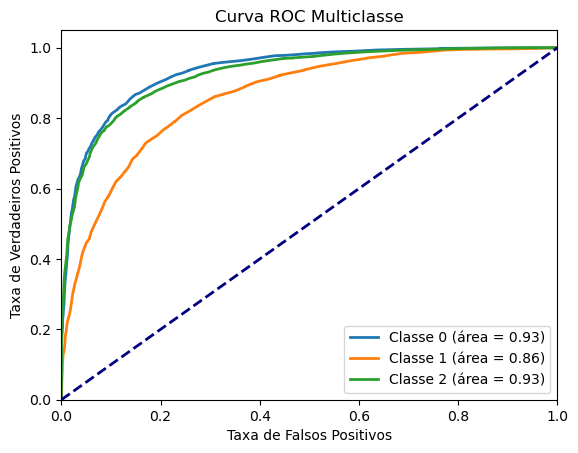

In [32]:
plt.figure()
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Classe {i} (área = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc='lower right')
plt.show()


#for i in range(y_test_bin.shape[1]):

#Itera sobre cada classe, extraindo as colunas correspondentes de y_test_bin (rótulos binarizados) e y_proba (probabilidades previstas)

#fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i]):

#Calcula a Taxa de Falsos Positivos (FPR) e Taxa de Verdadeiros Positivos (TPR) para a classe i

#roc_auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i]):

#Calcula a área sob a curva ROC (AUC-ROC) para a classe i

#plt.plot(fpr, tpr, lw=2, label=f'Classe {i} (área = {roc_auc:.2f})'):

#Plota a curva ROC para cada classe e adiciona a legenda com o valor de AUC

#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--'):

#Plota a linha diagonal de referência para uma curva ROC aleatória (AUC = 0.5)

# Definição dos limites e rótulos dos eixos:

#Configura os limites dos eixos e os rótulos para a curva ROC

# plt.legend(loc='lower right'):

#Coloca a legenda no canto inferior direito

# plt.show():

#Exibe o gráfico com as curvas ROC para cada classe

#Visualizar a performance do modelo em termos de classificação, mostrando como ele discrimina corretamente entre as classes com base nas taxas de falsos e verdadeiros positivos

## Decision Tree

In [33]:
data = DecisionTreeClassifier()


data.fit(X_train, y_train)


y_pred = data.predict(X_test)

#Treinar uma árvore de decisão para realizar previsões e avaliar o desempenho em um conjunto de dados de teste

In [34]:
y_pred = data.predict(X_test)
print(classification_report(y_test, y_pred, target_names=class_names))
#Avaliar o desempenho da árvore de decisão com métricas de classificação, como precisão, revocação, e F1-Score, para cada classe

              precision    recall  f1-score   support

        Away       0.76      0.77      0.76      2455
        Draw       0.61      0.61      0.61      1830
        Home       0.83      0.83      0.83      3781

    accuracy                           0.76      8066
   macro avg       0.73      0.73      0.73      8066
weighted avg       0.76      0.76      0.76      8066



## Catboost

In [35]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)
catboost_classifier = CatBoostClassifier(
    loss_function='MultiClass',
    eval_metric='MultiClass',    
    iterations=400,               
    l2_leaf_reg=3,
    depth=6,
    learning_rate=0.01
)

catboost_classifier.fit(
    train_pool,
    eval_set=test_pool,
    metric_period=10,
    plot=True,
    verbose=50
)


#train_pool = Pool(X_train, y_train) e test_pool = Pool(X_test, y_test):

#Cria conjuntos de dados Pool para o CatBoost. O Pool é uma estrutura de dados específica do CatBoost que facilita o manuseio dos dados de treino e teste

#Configuração do classificador:

#CatBoostClassifier(loss_function='MultiClass', eval_metric='MultiClass', ...):
#Define um classificador para classificação multiclasse
#loss_function='MultiClass': Função de perda para problemas de múltiplas classes
#eval_metric='MultiClass': Métrica de avaliação para problemas multiclasse
#iterations=400: Número de iterações (número de árvores geradas no modelo)
#l2_leaf_reg=3: Regularização L2 para folhas, ajuda a prevenir overfitting
#depth=6: Profundidade máxima das árvores de decisão
#learning_rate=0.01: Taxa de aprendizado para a atualização dos pesos do modelo

#Treinamento do modelo:

#catboost_classifier.fit(...): Treina o modelo com os dados de treino
#train_pool: Dados de treino.
#eval_set=test_pool: Dados de teste para avaliar o modelo durante o treinamento
#metric_period=10: Exibe métricas de avaliação a cada 10 iterações
#plot=True: Gera gráficos da métrica de avaliação ao longo das iterações
#verbose=50: Exibe logs de progresso a cada 50 iterações


#Seu objetivo é treinar um classificador CatBoost para problemas multiclasse e avaliar seu desempenho durante o treinamento

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0913416	test: 1.0913982	best: 1.0913982 (0)	total: 57.8ms	remaining: 23.1s
50:	learn: 0.8725073	test: 0.8730507	best: 0.8730507 (50)	total: 429ms	remaining: 2.94s
100:	learn: 0.7844108	test: 0.7852674	best: 0.7852674 (100)	total: 778ms	remaining: 2.3s
150:	learn: 0.7413004	test: 0.7425472	best: 0.7425472 (150)	total: 1.12s	remaining: 1.85s
200:	learn: 0.7175157	test: 0.7191707	best: 0.7191707 (200)	total: 1.44s	remaining: 1.42s
250:	learn: 0.7027877	test: 0.7050207	best: 0.7050207 (250)	total: 1.72s	remaining: 1.02s
300:	learn: 0.6923224	test: 0.6952128	best: 0.6952128 (300)	total: 2.02s	remaining: 664ms
350:	learn: 0.6841452	test: 0.6877439	best: 0.6877439 (350)	total: 2.34s	remaining: 327ms
399:	learn: 0.6776775	test: 0.6819566	best: 0.6819566 (399)	total: 2.6s	remaining: 0us

bestTest = 0.6819566185
bestIteration = 399



In [36]:
y_pred = catboost_classifier.predict(X_test)
#Obter as predições do modelo CatBoost treinado, para posteriormente avaliar o desempenho comparando essas predições com os rótulos reais y_test

In [37]:
print(classification_report(y_test, y_pred, target_names=class_names))
#Avaliar a performance do modelo, mostrando métricas para cada classe e proporcionando uma visão detalhada do desempenho de classificação

              precision    recall  f1-score   support

        Away       0.76      0.74      0.75      2455
        Draw       0.50      0.50      0.50      1830
        Home       0.80      0.81      0.80      3781

    accuracy                           0.72      8066
   macro avg       0.69      0.68      0.68      8066
weighted avg       0.72      0.72      0.72      8066



## XG Boost

In [38]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


#label_encoder = LabelEncoder():

#Cria um objeto LabelEncoder para converter os rótulos em valores numéricos

#y_train_encoded = label_encoder.fit_transform(y_train):

#Treina o LabelEncoder nos rótulos de treino (y_train) e, ao mesmo tempo, transforma os rótulos categóricos em valores numéricos
#Exemplo: 'Away' -> 0, 'Draw' -> 1, 'Home' -> 2

#y_test_encoded = label_encoder.transform(y_test):

#Transforma os rótulos de teste (y_test) usando o mesmo mapeamento aprendido durante o treino (não realiza um novo ajuste com o fit)

#Converter os rótulos categóricos (como 'Away', 'Draw', 'Home') em valores numéricos que podem ser usados por algoritmos de machine learning

In [39]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax')
xgb_classifier.fit(X_train, y_train_encoded)
#Treinar um classificador XGBoost para prever classes multiclasse, como 'Away', 'Draw', 'Home', utilizando rótulos numéricos codificados pelo LabelEncoder

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [40]:
y_pred = xgb_classifier.predict(X_test)
#Obter as predições do modelo XGBoost treinado e usar essas predições para avaliar a performance do modelo, comparando-as com os rótulos reais do conjunto de teste y_test_encoded

In [41]:
classes = label_encoder.classes_
#Recuperar os rótulos originais após usar o LabelEncoder para codificar os valores, possibilitando a conversão de volta aos rótulos categóricos se necessário

In [42]:
print(classification_report(y_test_encoded, y_pred, target_names=classes))
#Avaliar a performance do modelo em termos de precisão, revocação e F1-Score para cada classe, utilizando os rótulos originais para facilitar a interpretação

              precision    recall  f1-score   support

        Away       0.81      0.82      0.82      2455
        Draw       0.70      0.60      0.65      1830
        Home       0.83      0.88      0.85      3781

    accuracy                           0.80      8066
   macro avg       0.78      0.77      0.77      8066
weighted avg       0.79      0.80      0.79      8066



## SVM ou Support Vector Classification

In [43]:
svc = LinearSVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

#svc = LinearSVC():

#Cria um modelo de Support Vector Classifier com um kernel linear, adequado para problemas de classificação linearmente separáveis

#svc.fit(X_train, y_train):

#Treina o modelo SVC usando os dados de treino X_train (características) e y_train (rótulos)

#y_pred = svc.predict(X_test):

#Faz previsões com base nos dados de teste X_test, retornando os rótulos previstos e armazenando-os em y_pred

In [44]:
print(classification_report(y_test, y_pred, target_names=class_names))
#Avaliar a performance do modelo de forma detalhada, fornecendo uma visão clara sobre a capacidade de classificação do LinearSVC para cada classe

              precision    recall  f1-score   support

        Away       0.67      0.83      0.74      2455
        Draw       0.55      0.09      0.16      1830
        Home       0.71      0.89      0.79      3781

    accuracy                           0.69      8066
   macro avg       0.65      0.60      0.56      8066
weighted avg       0.66      0.69      0.63      8066



## Logistica

In [45]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#scaler = StandardScaler(with_mean=False):

#Cria um objeto StandardScaler que padroniza os dados. Também ajusta o StandardScaler para não centralizar (com with_mean=False) para dados esparsos

#with_mean=False: Indica que o escalonamento será feito sem centralizar os dados subtraindo a média (útil em casos de dados esparsos)

#X_train_scaled = scaler.fit_transform(X_train):

#Ajusta o scaler nos dados de treino X_train (calculando a variância) e transforma esses dados para que tenham uma variância padronizada

#X_test_scaled = scaler.transform(X_test):

#Transforma os dados de teste X_test usando os mesmos parâmetros calculados no conjunto de treino, para manter a consistência

In [46]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
#Treinar um modelo de Regressão Logística que pode ser usado para realizar classificações com base nos dados fornecidos, aproveitando os dados escalados para melhorar a performance

LogisticRegression()

In [47]:
y_pred = model.predict(X_test_scaled)
#Obter as predições do modelo de Regressão Logística para os dados de teste e, posteriormente, avaliar seu desempenho comparando as predições com os rótulos reais y_test

In [48]:
print(classification_report(y_test, y_pred, target_names=class_names))
#Avaliar o desempenho da Regressão Logística para cada classe com base em precisão, revocação e F1-Score, fornecendo uma visão detalhada da performance do modelo

              precision    recall  f1-score   support

        Away       0.71      0.78      0.75      2455
        Draw       0.53      0.32      0.40      1830
        Home       0.76      0.85      0.80      3781

    accuracy                           0.71      8066
   macro avg       0.67      0.65      0.65      8066
weighted avg       0.69      0.71      0.69      8066



## Matriz de Confusão

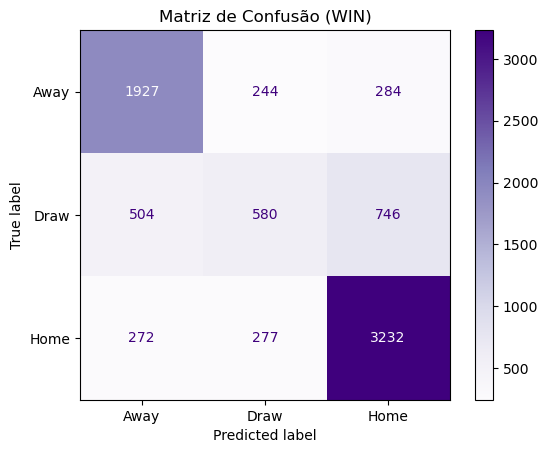

In [49]:
matriz = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Purples)
plt.title("Matriz de Confusão (WIN)")
plt.show()

#matriz = confusion_matrix(y_test, y_pred):

#Calcula a Matriz de Confusão comparando os rótulos reais (y_test) com os rótulos previstos (y_pred). A matriz de confusão mostra como as predições do modelo se alinham com os valores reais:
    #As linhas representam as classes reais
    #As colunas representam as classes previstas
    #Cada célula contém o número de predições feitas para uma classe específica

#disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=np.unique(y_test)):

#Cria uma instância de ConfusionMatrixDisplay para visualizar a matriz de confusão
#display_labels=np.unique(y_test): Define os rótulos das classes de acordo com os valores únicos em y_test

#disp.plot(cmap=plt.cm.Purples):

#Plota a matriz de confusão com um mapa de cores purples para facilitar a visualização

#plt.title("Matriz de Confusão (WIN)"):

#Define o título do gráfico

#plt.show():

#Exibe o gráfico

## Rede Neural

In [ ]:
data = pd.read_csv("faculdade\train_futebol.csv")

y = data['WIN'].map({'Away': 0, 'Draw': 1, 'Home': 2})

X = data.drop('WIN', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

def create_base_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(num_classes, activation='softmax')  
    ])
    return model

def create_l1_l2_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(num_classes, activation='softmax')  
    ])
    return model

def create_dropout_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(num_classes, activation='softmax')  
    ])
    return model

def create_l1_l2_dropout_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(num_classes, activation='softmax')  
    ])
    return model



#Carregamento dos dados:

    #data = pd.read_csv(): Carrega um conjunto de dados de futebol contendo uma coluna WIN com os resultados de partidas.
    #y = data['WIN'].map({'Away': 0, 'Draw': 1, 'Home': 2}): Mapeia os valores da coluna WIN para números: 'Away' -> 0, 'Draw' -> 1, 'Home' -> 2.
    #Separação dos dados: Usa train_test_split para separar os dados em conjuntos de treino, validação e teste.

#Codificação dos rótulos:

    #to_categorical: Converte os rótulos numéricos em codificação one-hot, necessária para problemas de classificação multiclasse.

#Modelos de Rede Neural:

    #create_base_model(input_shape, num_classes):

    #Define um modelo base com 5 camadas densas (fully connected), incluindo a camada de saída com ativação softmax para classificação multiclasse

    #create_l1_l2_model(input_shape, num_classes):

    #Similar ao modelo base, mas com regularização L1 e L2 para evitar overfitting, adicionando penalizações aos pesos das camadas densas

    #create_dropout_model(input_shape, num_classes):

    #Modelo com Dropout em camadas selecionadas para ajudar a prevenir overfitting, desligando aleatoriamente neurônios durante o treinamento

    #create_l1_l2_dropout_model(input_shape, num_classes):

    #Combina Dropout e regularização L1/L2 para fornecer uma rede neural mais robusta ao overfitting

#Objetivo:

    #Explorar diferentes arquiteturas de redes neurais, aplicando técnicas de regularização (L1/L2) e dropout para melhorar a generalização e evitar overfitting em problemas de classificação multiclasse, como a predição de resultados de partidas de futebol

In [51]:
categorical_features = ['Home', 'Away', 'evento']
numeric_features = ['Round', 'Yellow_Away', 'Yellow_Home', 'Goal_Away', 'Goal_Home', 
                    'Red_Card_Away', 'Red_Card_Home', 'Own_Home', 'Own_Away', 
                    'Penalty_Missed_Home', 'Penalty_Missed_Away', 'Var_Home', 'Var_Away']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = data.drop('WIN', axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

def create_base_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(num_classes, activation='softmax') 
    ])
    return model

num_classes = y_train.shape[1]

input_shape = X_train.shape[1]

model_base = create_base_model(input_shape, num_classes)

optimizer = Adam(learning_rate=0.001)
model_base.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history_base = model_base.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

y_pred_base = model_base.predict(X_test)

y_pred_base = np.argmax(y_pred_base, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

print("Relatório de Classificação - Modelo Base")
print(classification_report(y_test_labels, y_pred_base, target_names=['Away', 'Draw', 'Home']))


#Pré-processamento:

    #As colunas categóricas (categorical_features) são convertidas em one-hot encoding
    #As colunas numéricas (numeric_features) são escaladas usando StandardScaler
    #O ColumnTransformer é utilizado para aplicar essas transformações simultaneamente

#Divisão dos dados:

    #Os dados são divididos em conjuntos de treino, validação e teste usando train_test_split

#Codificação One-Hot para rótulos:

    #As classes de saída (y_train, y_val, y_test) são transformadas em formato one-hot encoded com a função to_categorical

#Definição do Modelo Base:

    #create_base_model define uma rede neural com várias camadas densas (64, 32, 16 e 8 neurônios) usando a ativação ReLU
    #A camada de saída usa softmax, o que é ideal para problemas de classificação multiclasse

#Compilação do Modelo:

    #O modelo é compilado com o otimizador Adam e a função de perda categorical_crossentropy (adequada para classificação multiclasse)

#Treinamento do Modelo:

    #O modelo é treinado por 150 épocas com um tamanho de batch de 32, utilizando os dados de validação para acompanhar o desempenho

#Predição e Avaliação:

    #O modelo faz predições nos dados de teste (X_test) e retorna probabilidades para cada classe
    #As probabilidades são convertidas nas classes previstas usando np.argmax
    #As classes reais (y_test) também são convertidas de one-hot encoding para rótulos numéricos

#Relatório de Classificação:

    #O relatório de classificação é exibido com precisão, revocação, F1-score e suporte para cada classe ('Away', 'Draw', 'Home')

#Objetivo:
    
    #Treinar uma rede neural básica para classificação multiclasse, processar as características de forma adequada e avaliar o desempenho utilizando um relatório de classificação

I0000 00:00:1726259354.800956    4471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-13 17:29:14.801384: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Relatório de Classificação - Modelo Base
              precision    recall  f1-score   support

        Away       0.87      0.81      0.84      2455
        Draw       0.72      0.76      0.74      1830
        Home       0.87      0.89      0.88      3781

    accuracy                           0.84      8066
   macro avg       0.82      0.82      0.82      8066
weighted avg       0.84      0.84      0.84      8066



253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia Base: 0.8260600049590875
Acurácia L1_L2: 0.8224646665013637
Acurácia Dropout: 0.8258120505826928
Acurácia L1_L2_Dropout: 0.8294073890404166


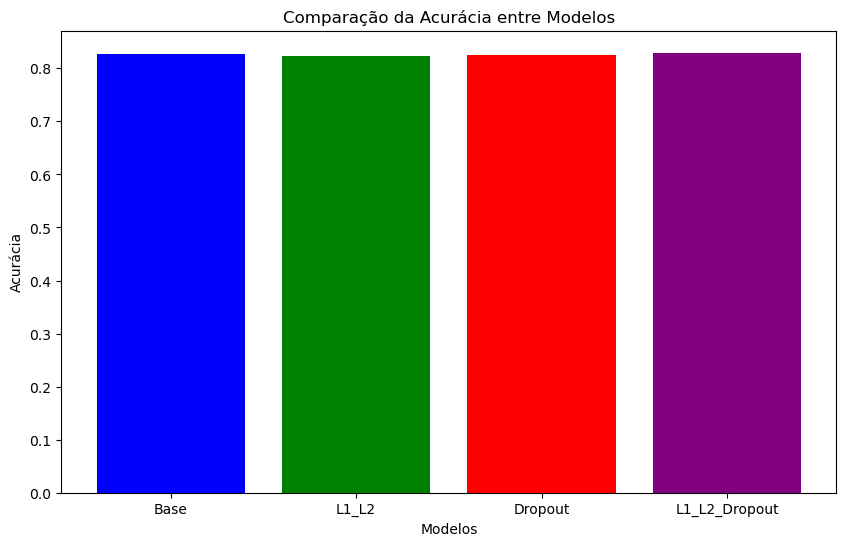

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = data.drop('WIN', axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

def create_base_model(input_shape, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(num_classes, activation='softmax')  
    ])
    return model

num_classes = y_train.shape[1]

input_shape = X_train.shape[1]

model_base = create_base_model(input_shape, num_classes)
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_base.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_l1_l2 = create_base_model(input_shape, num_classes)
model_l1_l2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_l1_l2.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_dropout = create_base_model(input_shape, num_classes)
model_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_dropout.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

model_l1_l2_dropout = create_base_model(input_shape, num_classes)
model_l1_l2_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_l1_l2_dropout.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val), verbose=0)

y_pred_base = model_base.predict(X_test)
y_pred_base = np.argmax(y_pred_base, axis=1)
acuracia_base = accuracy_score(np.argmax(y_test, axis=1), y_pred_base)

y_pred_l1_l2 = model_l1_l2.predict(X_test)
y_pred_l1_l2 = np.argmax(y_pred_l1_l2, axis=1)
acuracia_l1_l2 = accuracy_score(np.argmax(y_test, axis=1), y_pred_l1_l2)

y_pred_dropout = model_dropout.predict(X_test)
y_pred_dropout = np.argmax(y_pred_dropout, axis=1)
acuracia_dropout = accuracy_score(np.argmax(y_test, axis=1), y_pred_dropout)

y_pred_l1_l2_dropout = model_l1_l2_dropout.predict(X_test)
y_pred_l1_l2_dropout = np.argmax(y_pred_l1_l2_dropout, axis=1)
acuracia_l1_l2_dropout = accuracy_score(np.argmax(y_test, axis=1), y_pred_l1_l2_dropout)

print(f"Acurácia Base: {acuracia_base}")
print(f"Acurácia L1_L2: {acuracia_l1_l2}")
print(f"Acurácia Dropout: {acuracia_dropout}")
print(f"Acurácia L1_L2_Dropout: {acuracia_l1_l2_dropout}")

labels = ['Base', 'L1_L2', 'Dropout', 'L1_L2_Dropout']
values = [acuracia_base, acuracia_l1_l2, acuracia_dropout, acuracia_l1_l2_dropout]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação da Acurácia entre Modelos')
plt.show()




#Pré-processamento dos Dados:

    #As colunas categóricas são transformadas em one-hot encoding com o OneHotEncoder
    #As colunas numéricas são padronizadas com o StandardScaler
    #Os dados são separados em treino, validação e teste

#Treinamento de quatro modelos diferentes:

    #Modelo Base: Sem técnicas de regularização ou dropout
    #Modelo L1_L2: Aplica regularização L1 e L2 para reduzir overfitting
    #Modelo Dropout: Aplica dropout para desligar aleatoriamente neurônios durante o treinamento, ajudando a evitar overfitting
    #Modelo L1_L2_Dropout: Combina as técnicas de regularização L1/L2 com dropout

#Avaliação dos modelos:

    #Cada modelo é avaliado utilizando o conjunto de teste. As predições são feitas, e a acurácia (taxa de acertos) é calculada para cada modelo

#Visualização:

    #As acurácias de cada modelo são comparadas em um gráfico de barras

#Objetivo:

    #Treinar e comparar diferentes arquiteturas de redes neurais com técnicas de regularização (L1/L2) e dropout para avaliar qual abordagem resulta em melhor performance, medindo pela acurácia

## Aplicar hiperparametrização nos algoritmos

In [53]:
def create_model(units1, units2, units3, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(units1, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units2, activation='relu'))
    model.add(Dense(units3, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

data = pd.read_csv("/home/gugs881/faculdade/data/train_futebol.csv")

y = data['WIN'].map({'Away': 0, 'Draw': 1, 'Home': 2})

categorical_features = ['Home', 'Away', 'evento']
numeric_features = ['Round', 'Yellow_Away', 'Yellow_Home', 'Goal_Away', 'Goal_Home', 
                    'Red_Card_Away', 'Red_Card_Home', 'Own_Home', 'Own_Away', 
                    'Penalty_Missed_Home', 'Penalty_Missed_Away', 'Var_Home', 'Var_Away']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = data.drop('WIN', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

num_classes = y_train.shape[1]

param_grid = {
    'units1': [64, 128],
    'units2': [32, 64],
    'units3': [16, 32],
    'dropout_rate': [0.0, 0.2, 0.4],
    'learning_rate': [0.001, 0.0001]
}

def manual_hyperparameter_search(X_train, y_train, X_test, y_test, param_grid):
    best_accuracy = 0
    best_params = None
    for units1 in param_grid['units1']:
        for units2 in param_grid['units2']:
            for units3 in param_grid['units3']:
                for dropout_rate in param_grid['dropout_rate']:
                    for learning_rate in param_grid['learning_rate']:

                        model = create_model(units1, units2, units3, dropout_rate, learning_rate)
                        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
                        
                        y_pred = model.predict(X_test)
                        y_pred_classes = np.argmax(y_pred, axis=1)
                        y_test_classes = np.argmax(y_test, axis=1)
                        accuracy = accuracy_score(y_test_classes, y_pred_classes)
                        print(f"Tested parameters: units1={units1}, units2={units2}, units3={units3}, dropout_rate={dropout_rate}, learning_rate={learning_rate} -> Accuracy: {accuracy:.4f}")

                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_params = {
                                'units1': units1,
                                'units2': units2,
                                'units3': units3,
                                'dropout_rate': dropout_rate,
                                'learning_rate': learning_rate
                            }
    return best_params, best_accuracy

best_params, best_accuracy = manual_hyperparameter_search(X_train, y_train, X_test, y_test, param_grid)
print(f"Melhores Hiperparâmetros: {best_params} -> Acurácia: {best_accuracy:.4f}")



#Componentes principais:
#Função create_model:

    #Define um modelo de rede neural com três camadas densas totalmente conectadas, uma camada de dropout, e uma camada de saída com softmax para classificação multiclasse. Os hiperparâmetros (número de unidades por camada, taxa de dropout, taxa de aprendizado) são passados como parâmetros

#Pré-processamento:

    #O ColumnTransformer combina o escalonamento de características numéricas (StandardScaler) e o one-hot encoding das características categóricas
    #Os dados são divididos em conjuntos de treino e teste e, em seguida, transformados

#Busca Manual de Hiperparâmetros:

    #A função manual_hyperparameter_search realiza uma busca exaustiva (grid search) pelos hiperparâmetros definidos no dicionário param_grid:
        #units1, units2, units3: Número de unidades nas três camadas ocultas da rede
        #dropout_rate: Taxa de dropout para prevenir overfitting
        #learning_rate: Taxa de aprendizado usada pelo otimizador Adam
        #Para cada combinação de parâmetros, o modelo é treinado e a acurácia é calculada nos dados de teste

#Avaliação e seleção dos melhores hiperparâmetros:

    #A melhor configuração de hiperparâmetros é selecionada com base na acurácia no conjunto de teste
    #A função imprime a acurácia e a configuração testada a cada iteração, e no final exibe os melhores hiperparâmetros e a maior acurácia obtida

#Objetivo:

    #Realizar uma busca manual de hiperparâmetros em um espaço de combinações para encontrar a melhor configuração do modelo de rede neural, medindo o desempenho com base na acurácia

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tested parameters: units1=64, units2=32, units3=16, dropout_rate=0.0, learning_rate=0.001 -> Accuracy: 0.8287
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tested parameters: units1=64, units2=32, units3=16, dropout_rate=0.0, learning_rate=0.0001 -> Accuracy: 0.7493
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tested parameters: units1=64, units2=32, units3=16, dropout_rate=0.2, learning_rate=0.001 -> Accuracy: 0.8195
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tested parameters: units1=64, units2=32, units3=16, dropout_rate=0.2, learning_rate=0.0001 -> Accuracy: 0.7433
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tested parameters: units1=64, units2=32, units3=16, dropout_rate=0.4, learning_rate=0.001 -> Accuracy: 0.8079
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tested parameters: units1=64, units2=32, units3=16, dropout_rate=0.4, learning_rate=0.0001 -> Accuracy: 0.7363
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tested parameters: units1=64, units2=32, units3=32

## K-fold de 3

In [ ]:
data = pd.read_csv("faculdade\train_futebol.csv")

y = data['WIN'].map({'Away': 0, 'Draw': 1, 'Home': 2}).values

categorical_features = ['Home', 'Away', 'evento']
numeric_features = ['Round', 'Yellow_Away', 'Yellow_Home', 'Goal_Away', 'Goal_Home', 
                    'Red_Card_Away', 'Red_Card_Home', 'Own_Home', 'Own_Away', 
                    'Penalty_Missed_Home', 'Penalty_Missed_Away', 'Var_Home', 'Var_Away']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = data.drop('WIN', axis=1)

X = preprocessor.fit_transform(X)

def create_model(units1=64, units2=32, units3=16, dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units1, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(units2, activation='relu'))
    model.add(Dense(units3, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

kf = KFold(n_splits=3, shuffle=True, random_state=42)

fold_accuracies = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    y_train = to_categorical(y_train, num_classes=3)
    y_test = to_categorical(y_test, num_classes=3)

    model = create_model(units1=64, units2=32, units3=16, dropout_rate=0.2, learning_rate=0.001)

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    fold_accuracies.append(accuracy)
    
    print(f"Acurácia do Fold {fold + 1}: {accuracy:.4f}")
    print()

print(f"Acurácia média nos folds: {np.mean(fold_accuracies):.4f}")


#Componentes principais:
#Leitura e pré-processamento dos dados:

    #O arquivo CSV é lido e os rótulos são mapeados para valores numéricos (0 para 'Away', 1 para 'Draw', e 2 para 'Home')
    #As características categóricas e numéricas são transformadas com OneHotEncoder e StandardScaler respectivamente, usando um ColumnTransformer
    #Os dados são então transformados e prontos para o treinamento

#Definição do modelo:

    #A função create_model define uma rede neural com 3 camadas ocultas, uma camada de Dropout para evitar overfitting, e uma camada de saída com 3 neurônios e ativação softmax (usada para problemas multiclasse)
    #O modelo é compilado com o otimizador Adam e a função de perda categorical_crossentropy

#Validação Cruzada (K-Fold):

    #O KFold com 3 divisões é utilizado para dividir os dados em 3 folds diferentes

#Para cada fold:

    #O conjunto de dados é dividido em treino e teste
    #O modelo é criado e treinado por 50 épocas
    #As predições são feitas no conjunto de teste
    #A acurácia do fold é calculada e armazenada

#Acurácia média:

    #Após treinar o modelo e calcular a acurácia em cada fold, a acurácia média é exibida

#Objetivo:

    #Treinar e avaliar o desempenho do modelo em diferentes divisões dos dados usando validação cruzada. A acurácia média dos 3 folds dá uma ideia de como o modelo generaliza

Fold 1
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia do Fold 1: 0.8106

Fold 2
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia do Fold 2: 0.8115

Fold 3
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia do Fold 3: 0.8077

Acurácia média nos folds: 0.8099


## Resumo



Este projeto de classificação multiclasse para predição de resultados de partidas de futebol utilizou uma variedade de abordagens e modelos. A seguir, um resumo detalhado das etapas, métodos e o porquê de cada decisão:

### Modelos Utilizados

* XGBoost:

Modelo: XGBClassifier
Por que foi utilizado: É eficiente em classificação multiclasse, oferece controle de overfitting e é otimizado para grandes volumes de dados.

* CatBoost:

Modelo: CatBoostClassifier
Por que foi utilizado: Trata variáveis categóricas de forma nativa, sem necessidade de codificação manual como o one-hot encoding. Também lida bem com dados desbalanceados.

* Random Forest:

Modelo: RandomForestClassifier
Por que foi utilizado: É robusto contra overfitting devido ao uso de múltiplas árvores de decisão e pode capturar interações complexas entre variáveis.

* Regressão Logística:

Modelo: LogisticRegression
Por que foi utilizado: Um modelo linear simples, utilizado como baseline para comparar com outros modelos mais complexos.

* Support Vector Machine (SVM):

Modelo: LinearSVC
Por que foi utilizado: Classificador eficiente para problemas linearmente separáveis, com regularização integrada para evitar overfitting.

* Árvore de Decisão:

Modelo: DecisionTreeClassifier
Por que foi utilizado: Modelo interpretável que cria divisões de dados baseadas nas features, usado como baseline para comparar com modelos mais complexos.

* Rede Neural (MLP - Multilayer Perceptron):

Modelo: Sequential (Keras)
Por que foi utilizado: Utilizada para capturar padrões complexos nos dados com múltiplas camadas densas. Modelos com Dropout e Regularização L1/L2 foram usados para prevenir overfitting.

### Técnicas de Avaliação Utilizadas

* Curva ROC (Receiver Operating Characteristic):

Por que foi utilizado: A Curva ROC avalia o desempenho do classificador em termos de sensibilidade (taxa de verdadeiros positivos) versus especificidade (taxa de falsos positivos).
Método aplicado: A curva ROC foi usada para visualização das métricas de performance de classificação multiclasse, com cálculo da AUC (Área sob a Curva) para cada classe.

* Matriz de Confusão:

Por que foi utilizado: A Matriz de Confusão fornece uma visão detalhada de como o modelo está classificando corretamente ou incorretamente cada classe. Ela mostra as contagens de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.
Método aplicado: Utilizou-se a função confusion_matrix para calcular a matriz e ConfusionMatrixDisplay para visualizar os resultados, permitindo uma melhor análise do desempenho de cada classe no modelo.

### Técnicas Auxiliares

* Validação Cruzada (K-Fold):

Por que foi utilizado: A validação cruzada K-Fold garante que o modelo seja avaliado em diferentes divisões dos dados, fornecendo uma melhor ideia de sua capacidade de generalização.
Método aplicado: O KFold foi utilizado para dividir o dataset em múltiplos folds e calcular a acurácia média ao longo dos folds, ajudando a identificar se o modelo está superajustado ou generalizando bem.

* Busca Manual de Hiperparâmetros:

Por que foi utilizado: A busca de hiperparâmetros é essencial para melhorar a performance dos modelos, ajustando parâmetros como número de neurônios, taxa de dropout, e taxa de aprendizado para otimizar o desempenho.
Método aplicado: Foi implementada uma busca manual para testar várias combinações de parâmetros, maximizando a acurácia do modelo.

### Conclusão

Neste projeto, uma combinação de técnicas de machine learning, redes neurais, e estratégias de avaliação robustas foram utilizadas. XGBoost, CatBoost, e Redes Neurais foram combinados com Curvas ROC e Matrizes de Confusão para avaliar a performance, enquanto Árvores de Decisão e Random Forest forneceram uma base interpretável. A validação cruzada e a busca de hiperparâmetros garantiram que o modelo fosse ajustado e validado de forma apropriada, proporcionando uma abordagem completa para a predição de resultados de futebol.